In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv("D:\\ML-DataSets\\train.csv", usecols=['Age', 'Fare', 'Survived'])

In [43]:
x = df.iloc[:,1:3]
y = df.iloc[:,0:1]

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Density'>

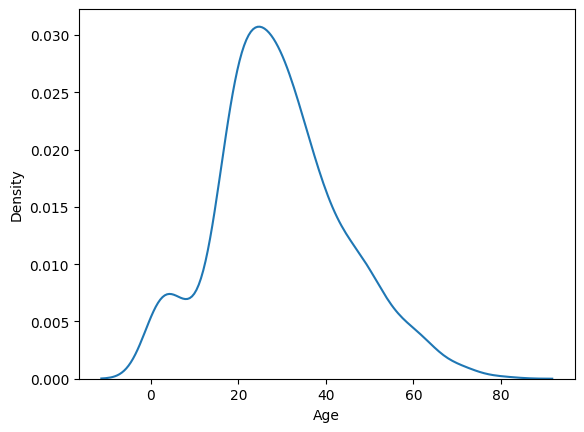

In [45]:
sns.kdeplot(x['Age'])

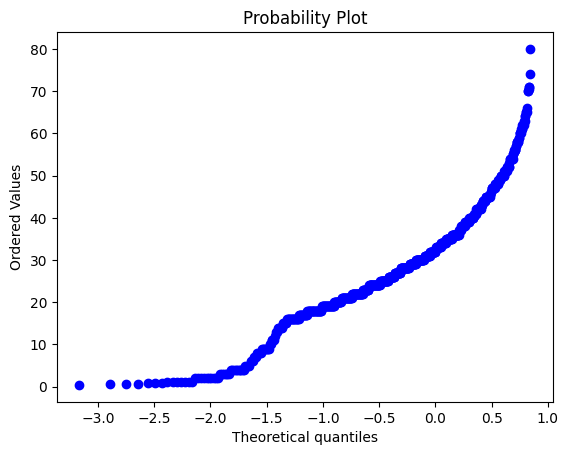

In [46]:
import scipy.stats as stats
stats.probplot(x['Age'], plot = plt)
plt.show()

<Axes: xlabel='Fare', ylabel='Density'>

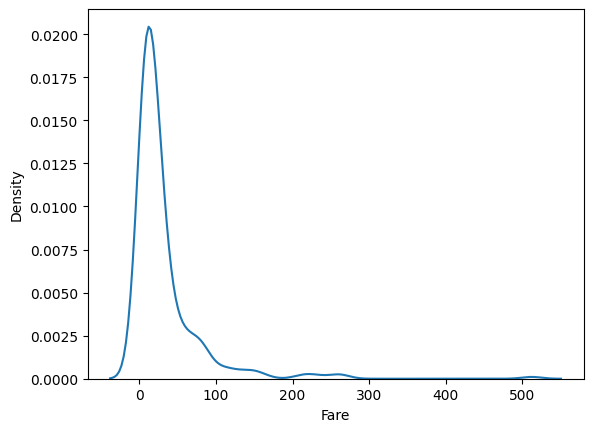

In [47]:
sns.kdeplot(x['Fare'])

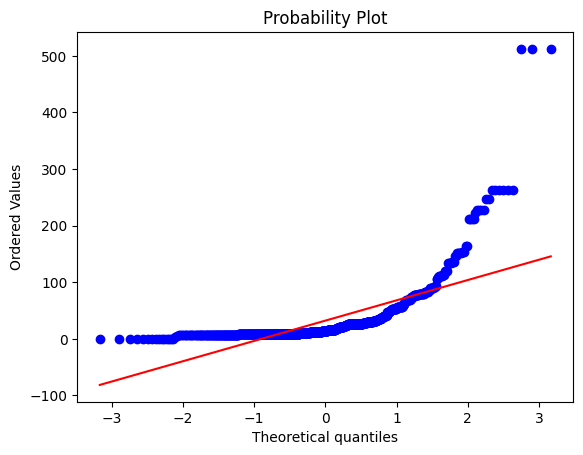

In [48]:
stats.probplot(x['Fare'], plot = plt)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
si = SimpleImputer()
x_train = si.fit_transform(x_train)
x_test = si.transform(x_test)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [54]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [55]:
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)

c:\Users\ANKAN KUMAR SAHOO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()

In [56]:
y_pred_LR = clf1.predict(x_test)
y_pred_DT = clf2.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
print(f"LR: {accuracy_score(y_test, y_pred_LR)}")
print(f"DT: {accuracy_score(y_test, y_pred_DT)}")

LR: 0.6480446927374302
DT: 0.6703910614525139


# Using Function Transformer 

In [60]:
from sklearn.preprocessing import FunctionTransformer

In [61]:
trf = FunctionTransformer(func = np.log1p)

In [66]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [67]:
clf1.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

c:\Users\ANKAN KUMAR SAHOO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()

In [69]:
y_pred1 = clf1.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

In [70]:
print(f"LR: {accuracy_score(y_test, y_pred1)}")
print(f"DT: {accuracy_score(y_test, y_pred2)}")

LR: 0.6815642458100558
DT: 0.6815642458100558
